___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [4]:
customers = pd.read_csv("Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [55]:
sns.set_palette("GnBu_d", desat= 0.3)
sns.set_style('whitegrid')

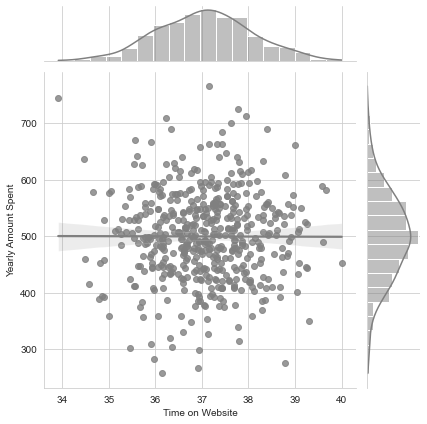

In [21]:
sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = customers, kind = 'reg', color = 'grey')

The visual correlation doesn't make a lot of sense, if someone spend more time on the Website I would expect the Yearly Amount Spent to be a little higher.

**Do the same but with the Time on App column instead.**

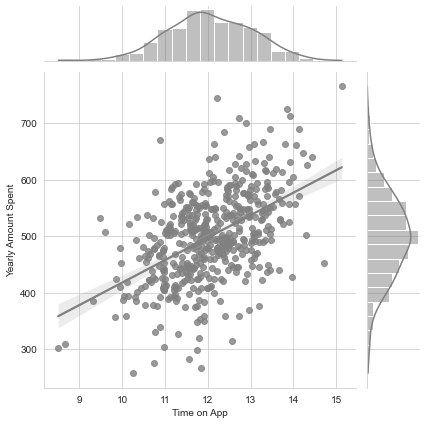

In [24]:
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = customers, kind = 'reg', color = 'grey')

This correlation makes more sense, the more time someone spent in the App the more money they spend.

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

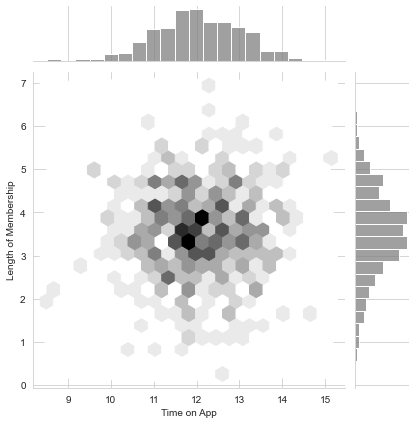

In [28]:
sns.jointplot(x = "Time on App", y = "Length of Membership", data = customers, kind = 'hex', color = 'grey')

From this hexplot, I would say that the relationship between the Length of Membership and Time of App is not completely linear, it comes a moment where the Length of Membership does not involve more Time on App. A plot between Length of Membership and Yearly Amount Spent may be more valuable. 

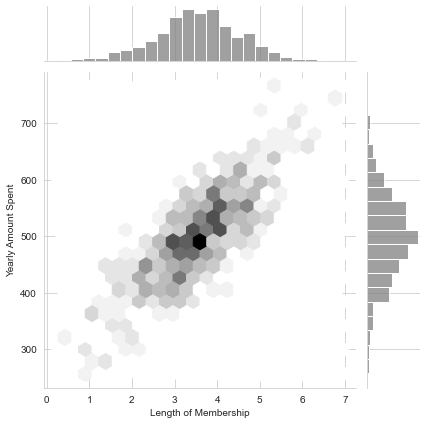

In [29]:
sns.jointplot(x = "Length of Membership", y = "Yearly Amount Spent", data = customers, kind = 'hex', color = 'grey')

There is clearly a relationship between both variables.

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

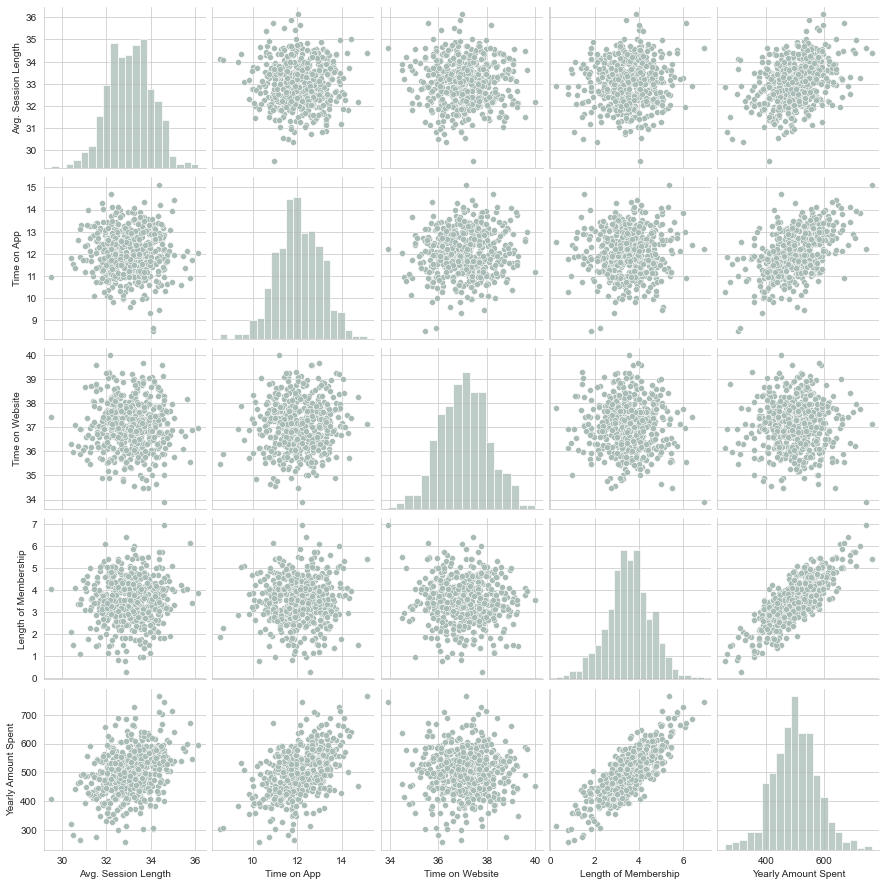

In [56]:
sns.pairplot(customers)

Clearly the highest correlated variable with Yearly Amount Spent is the Length of Membership.

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

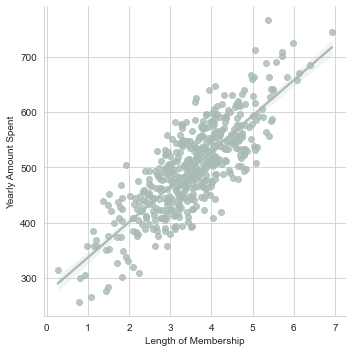

In [57]:
sns.lmplot(x = "Length of Membership", y = "Yearly Amount Spent", data = customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [86]:
X1 = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y1 = customers[['Yearly Amount Spent']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=101)

## Training the Model

Now its time to train our model on our training data!

**The project guidance asks to do it with LinearRegression from sklearn.linear_model, but the statsmodels gives a more complete result**

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

**Create an instance of a LinearRegression() model named lm.**

In [90]:
#Adding a constant value of 1 to the X_train
X1_train = sm.add_constant(data = X1_train, prepend=True)

In [91]:
lm1 = sm.OLS(endog = y1_train, exog = X1_train)

**Train/fit lm on the training data.**

In [92]:
lm1 = lm1.fit()

**Summary of the model**

In [93]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     4332.
Date:                 Tue, 08 Mar 2022   Prob (F-statistic):          1.47e-260
Time:                         17:40:15   Log-Likelihood:                -1120.4
No. Observations:                  300   AIC:                             2251.
Df Residuals:                      295   BIC:                             2269.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1045.1152     30.777    -33.957      0.000   -1105.686    -984.544
Avg. Session Length     25.6915      0.587     43.799      0.000      24.537      26.846
Time on App             37.8926      0.633     59.869      0.000      36.647      39.138
Time on Website          0.5606      0.627      0.895      0.372      -0.673       1.794
Length of Membership    61.6486      0.594    103.862      0.000      60.480      62.817
==============================================================================
Omnibus:                        0.970   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                1.005
Skew:                          -0.136   Prob(JB):                        0.605
Kurtosis:                       2.919   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The model confirms what we already thought, Time on Website is not statistically significant. Let's drop it from the model and see how it performs this time.**

In [94]:
X2 = customers[['Avg. Session Length', 'Time on App',
        'Length of Membership']]
y2 = customers[['Yearly Amount Spent']]

In [95]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=101)

In [127]:
X2_train = sm.add_constant(data = X2_train, prepend=True)
X2_test = sm.add_constant(data = X2_test, prepend = True)

In [128]:
lm2 = sm.OLS(endog = y2_train, exog = X2_train)

In [129]:
lm2 = lm2.fit()

In [130]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     5779.
Date:                 Tue, 08 Mar 2022   Prob (F-statistic):          2.66e-262
Time:                         17:53:43   Log-Likelihood:                -1120.8
No. Observations:                  300   AIC:                             2250.
Df Residuals:                      296   BIC:                             2264.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1025.2433     21.296    -48.143      0.000   -1067.154    -983.333
Avg. Session Length     25.7015      0.586     43.838      0.000      24.548      26.855
Time on App             37.9551      0.629     60.357      0.000      36.718      39.193
Length of Membership    61.5998      0.591    104.256      0.000      60.437      62.763
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.966
Skew:                          -0.130   Prob(JB):                        0.617
Kurtosis:                       2.903   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The model has the same R-squared, a higher F statistic, and all the variables are significant with 95% confidence level.**

**It's easier to do the testing of the data with the sklearn model, and it's really simple, because we already know the model we are going to use**

In [204]:
from sklearn.linear_model import LinearRegression

X = customers[['Avg. Session Length', 'Time on App',
        'Length of Membership']]
y = customers[['Yearly Amount Spent']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [205]:
predictions = lm.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0.5, 0, 'Predicted Y')

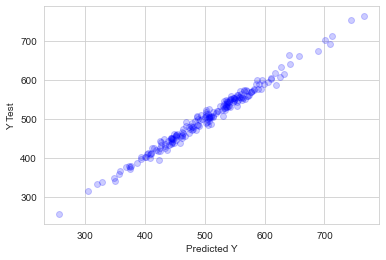

In [206]:
plt.scatter(x = y_test, y = predictions, color = 'blue', alpha = 0.2)
plt.ylabel("Y Test")
plt.xlabel("Predicted Y")

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [141]:
from sklearn import metrics

In [207]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  7.7141424309634115
MSE:  93.79530581081742
RMSE:  9.684797664939492


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [209]:
residuals = y_test - predictions

<AxesSubplot:ylabel='Count'>

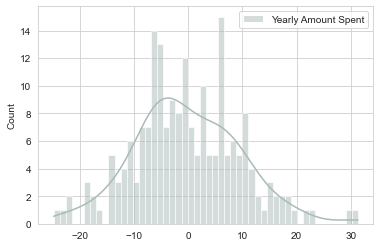

In [212]:
sns.histplot(residuals,bins=50, kde=True)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below.**

In [232]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.983
Model:                             OLS   Adj. R-squared:                  0.983
Method:                  Least Squares   F-statistic:                     5779.
Date:                 Tue, 08 Mar 2022   Prob (F-statistic):          2.66e-262
Time:                         18:37:54   Log-Likelihood:                -1120.8
No. Observations:                  300   AIC:                             2250.
Df Residuals:                      296   BIC:                             2264.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1025.2433     21.296    -48.143      0.000   -1067.154    -983.333
Avg. Session Length     25.7015      0.586     43.838      0.000      24.548      26.855
Time on App             37.9551      0.629     60.357      0.000      36.718      39.193
Length of Membership    61.5998      0.591    104.256      0.000      60.437      62.763
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.966
Skew:                          -0.130   Prob(JB):                        0.617
Kurtosis:                       2.903   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**How can you interpret these coefficients?**

The Yearly Amount Spent increases in 25.7 dollars when a person spends 1 extra minute in a personal session, 37.95 dollars for every extra minute spent on the App and 61.6 dollars for every extra year being a member.

**Do you think the company should focus more on their mobile app or on their website?**

The mobile app is definitely the way to go, it has a bigger statistical significance in the Yearly Amount Spent, even if we kept it in the model the increase on the amount spent for every minute spent in the website is more than 40 times less than in app. At the same time, we could have more information in order to make a decision, the amount of members, how much is the company already spending on the app and in the website(there could be a marginal effect that you cannot see easily). There are also other relations that are worth checking out. Do members prefer the App or the Website?

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.